In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/penguins.csv')
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.tail()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE
343,49.9,16.1,213.0,5400.0,MALE


In [ ]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [ ]:
df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [ ]:
df['sex']=df['sex'].str.replace('.','0')
df.loc[df.sex=='0','sex']=np.NaN

In [ ]:
df['culmen_length_mm']=df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm']=df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm']=df['flipper_length_mm'].fillna(df['flipper_length_mm'].mode()[0])
df['body_mass_g']=df['body_mass_g'].fillna(df['body_mass_g'].mode()[0])
df['sex']=df['sex'].fillna(df['sex'].mode()[0])
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['sex']=lb.fit_transform(df['sex'])
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.10000,18.70000,181.0,3750.0,1
1,39.50000,17.40000,186.0,3800.0,0
2,40.30000,18.00000,195.0,3250.0,0
3,43.92193,17.15117,190.0,3800.0,1
4,36.70000,19.30000,193.0,3450.0,0
...,...,...,...,...,...
339,43.92193,17.15117,190.0,3800.0,1
340,46.80000,14.30000,215.0,4850.0,0
341,50.40000,15.70000,222.0,5750.0,1
342,45.20000,14.80000,212.0,5200.0,0


In [ ]:
df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
dtype: object

In [ ]:
x=df
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.10000,18.70000,181.0,3750.0,1
1,39.50000,17.40000,186.0,3800.0,0
2,40.30000,18.00000,195.0,3250.0,0
3,43.92193,17.15117,190.0,3800.0,1
4,36.70000,19.30000,193.0,3450.0,0
...,...,...,...,...,...
339,43.92193,17.15117,190.0,3800.0,1
340,46.80000,14.30000,215.0,4850.0,0
341,50.40000,15.70000,222.0,5750.0,1
342,45.20000,14.80000,212.0,5200.0,0


In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(x)
  wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(wcss)

[242792021.2435469, 81864396.13776402, 52253687.05777058, 29407745.139842518, 16369913.582882991, 11087685.912169252, 8338362.85360717, 6041966.72438707, 4805259.589432088, 3708449.667446485]


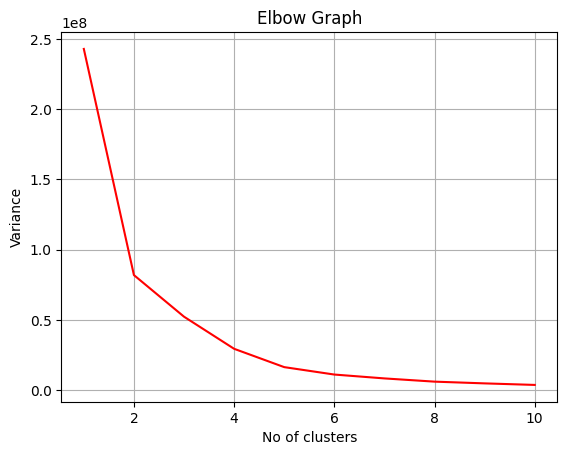

In [ ]:
x_axis=range(1,11)
y_axis=wcss
plt.plot(x_axis,y_axis,color='r')
plt.xlabel('No of clusters')
plt.ylabel('Variance')
plt.title('Elbow Graph')
plt.grid()

In [ ]:
model1=KMeans(n_clusters=7,init='k-means++',random_state=42)
model1.fit(x)
ypred=model1.predict(x)
ypred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 4, 0, 0, 0, 0, 2, 0, 3, 4, 0, 4, 0, 2, 0, 0, 2, 4, 6, 4, 0,
       0, 6, 0, 0, 0, 4, 4, 6, 4, 6, 4, 6, 4, 6, 6, 0, 4, 2, 4, 6, 4, 2,
       4, 2, 0, 4, 0, 6, 0, 6, 0, 6, 4, 0, 0, 0, 4, 0, 4, 2, 0, 6, 4, 6,
       4, 6, 4, 2, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 4, 2, 0, 6, 4, 0, 0, 0,
       6, 0, 0, 6, 4, 2, 4, 6, 0, 2, 4, 6, 0, 2, 4, 6, 4, 0, 0, 6, 4, 2,
       0, 2, 4, 6, 6, 6, 4, 0, 4, 4, 4, 0, 0, 6, 4, 6, 4, 6, 4, 6, 4, 0,
       0, 2, 0, 6, 4, 6, 4, 6, 4, 0, 4, 0, 4, 0, 6, 0, 0, 0, 0, 6, 0, 6,
       0, 0, 0, 6, 4, 0, 6, 0, 0, 0, 0, 6, 0, 6, 4, 0, 0, 2, 0, 4, 4, 0,
       4, 6, 4, 0, 0, 2, 4, 6, 4, 6, 0, 6, 0, 2, 4, 2, 6, 0, 0, 0, 0, 2,
       4, 6, 4, 0, 4, 6, 0, 6, 4, 0, 4, 6, 0, 0, 6, 0, 0, 6, 4, 0, 6, 0,
       2, 5, 2, 5, 5, 2, 2, 1, 2, 1, 2, 5, 2, 5, 6, 5, 6, 5, 2, 1, 5, 1,
       2, 1, 1, 1, 6, 5, 2, 5, 1, 2, 1, 5, 1, 5, 1, 1, 2, 1, 6, 5, 6, 2,
       5, 1, 6, 5, 1, 1, 1, 1, 2, 1, 1, 1, 6, 1, 2, 5, 6, 1, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 1, 1, 1, 2, 5, 2, 5, 2, 5, 2,

In [ ]:
df['Output']=ypred
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Output
0,39.10000,18.70000,181.0,3750.0,1,0
1,39.50000,17.40000,186.0,3800.0,0,0
2,40.30000,18.00000,195.0,3250.0,0,4
3,43.92193,17.15117,190.0,3800.0,1,0
4,36.70000,19.30000,193.0,3450.0,0,0
...,...,...,...,...,...,...
339,43.92193,17.15117,190.0,3800.0,1,0
340,46.80000,14.30000,215.0,4850.0,0,1
341,50.40000,15.70000,222.0,5750.0,1,5
342,45.20000,14.80000,212.0,5200.0,0,1


In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x

array([[3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 1.00e+00],
       [3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 0.00e+00],
       [4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 0.00e+00],
       ...,
       [5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 1.00e+00],
       [4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 0.00e+00],
       [4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 1.00e+00]])

In [ ]:
y

array([0, 0, 4, 0, 0, 0, 0, 2, 0, 3, 4, 0, 4, 0, 2, 0, 0, 2, 4, 6, 4, 0,
       0, 6, 0, 0, 0, 4, 4, 6, 4, 6, 4, 6, 4, 6, 6, 0, 4, 2, 4, 6, 4, 2,
       4, 2, 0, 4, 0, 6, 0, 6, 0, 6, 4, 0, 0, 0, 4, 0, 4, 2, 0, 6, 4, 6,
       4, 6, 4, 2, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 4, 2, 0, 6, 4, 0, 0, 0,
       6, 0, 0, 6, 4, 2, 4, 6, 0, 2, 4, 6, 0, 2, 4, 6, 4, 0, 0, 6, 4, 2,
       0, 2, 4, 6, 6, 6, 4, 0, 4, 4, 4, 0, 0, 6, 4, 6, 4, 6, 4, 6, 4, 0,
       0, 2, 0, 6, 4, 6, 4, 6, 4, 0, 4, 0, 4, 0, 6, 0, 0, 0, 0, 6, 0, 6,
       0, 0, 0, 6, 4, 0, 6, 0, 0, 0, 0, 6, 0, 6, 4, 0, 0, 2, 0, 4, 4, 0,
       4, 6, 4, 0, 0, 2, 4, 6, 4, 6, 0, 6, 0, 2, 4, 2, 6, 0, 0, 0, 0, 2,
       4, 6, 4, 0, 4, 6, 0, 6, 4, 0, 4, 6, 0, 0, 6, 0, 0, 6, 4, 0, 6, 0,
       2, 5, 2, 5, 5, 2, 2, 1, 2, 1, 2, 5, 2, 5, 6, 5, 6, 5, 2, 1, 5, 1,
       2, 1, 1, 1, 6, 5, 2, 5, 1, 2, 1, 5, 1, 5, 1, 1, 2, 1, 6, 5, 6, 2,
       5, 1, 6, 5, 1, 1, 1, 1, 2, 1, 1, 1, 6, 1, 2, 5, 6, 1, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 1, 1, 1, 2, 5, 2, 5, 2, 5, 2,

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)
xtrain

array([[3.60e+01, 1.71e+01, 1.87e+02, 3.70e+03, 0.00e+00],
       [3.97e+01, 1.89e+01, 1.84e+02, 3.55e+03, 1.00e+00],
       [3.97e+01, 1.77e+01, 1.93e+02, 3.20e+03, 0.00e+00],
       ...,
       [3.96e+01, 1.72e+01, 1.96e+02, 3.55e+03, 0.00e+00],
       [4.93e+01, 1.57e+01, 2.17e+02, 5.85e+03, 1.00e+00],
       [4.22e+01, 1.85e+01, 1.80e+02, 3.55e+03, 0.00e+00]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)
xtrain

array([[-1.47264526e+00, -1.50719242e-02, -1.03496395e-01,
        -6.19472008e-01, -9.96370224e-01],
       [-7.83795346e-01,  8.83542587e-01, -1.13842272e-01,
        -8.08300534e-01,  1.00364300e+00],
       [-7.83795346e-01,  2.84466246e-01, -8.28046400e-02,
        -1.24890043e+00, -9.96370224e-01],
       ...,
       [-8.02412911e-01,  3.48511042e-02, -7.24587627e-02,
        -8.08300534e-01, -9.96370224e-01],
       [ 1.00349093e+00, -7.13994322e-01, -3.76213721e-05,
         2.08707020e+00,  1.00364300e+00],
       [-3.18356211e-01,  6.83850474e-01, -1.27636775e-01,
        -8.08300534e-01, -9.96370224e-01]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred1=knn.predict(xtest)
ypred1

array([2, 5, 1, 4, 5, 5, 6, 0, 2, 1, 6, 1, 5, 0, 6, 6, 0, 5, 6, 0, 2, 0,
       5, 1, 6, 0, 0, 0, 2, 0, 0, 0, 2, 4, 6, 4, 0, 0, 1, 4, 4, 6, 6, 2,
       2, 6, 0, 5, 6, 2, 0, 6, 0, 4, 1, 0, 5, 6, 0, 4, 1, 4, 5, 5, 0, 6,
       4, 6, 2], dtype=int32)

In [ ]:
ytest

array([2, 5, 1, 4, 5, 5, 6, 0, 6, 1, 6, 2, 5, 0, 6, 6, 0, 5, 6, 0, 2, 0,
       5, 1, 6, 0, 0, 0, 2, 0, 0, 0, 1, 4, 6, 4, 0, 4, 1, 4, 4, 6, 6, 2,
       2, 6, 0, 5, 2, 2, 0, 2, 0, 4, 5, 4, 5, 6, 0, 4, 1, 4, 5, 5, 0, 6,
       4, 6, 2], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(ytest,ypred1)
score

0.8840579710144928